In [1]:
import math, sys, os
import numpy as np
import scipy.linalg as cp
from  matplotlib import pyplot as plt
from numba import njit

In [2]:
@njit
def jacobiHE2D(U, alpha, N, T):
    #r = 1./(1.+4.*alpha)
    r = 1.-4.*alpha
    Utemp = U.copy() # Reference matrix
    for yy in range(1,N): # Iterate over the whole mesh
        for xx in range(1,N):
            #U[xx,yy] = r*(alpha*(Utemp[xx,yy+1]+Utemp[xx,yy-1]+Utemp[xx+1,yy]+Utemp[xx-1,yy])+Utemp[xx,yy])
            U[xx,yy] = r*Utemp[xx,yy]+alpha*(Utemp[xx,yy+1]+Utemp[xx,yy-1]+Utemp[xx+1,yy]+Utemp[xx-1,yy])
    return U

0.25
dt= 2.5e-05
Number of iterations to reach T_max = 0.15 :  6000


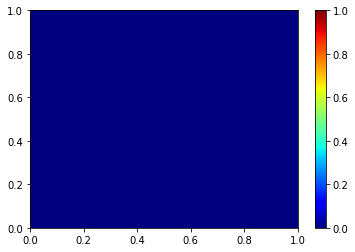

In [3]:
N = 100 # Square mesh size
x,dx = np.linspace(0,1,N+1,retstep=True)
y = x.copy() #Square mesh

dt = 0.25*dx**2
Tmax = 0.15
T = int(Tmax/dt)+1 #Target max time

alpha = dt/dx**2

#Initialize Mesh
U = np.zeros((N+1,N+1))

#Saving initial plot
fig, ax = plt.subplots()
im = ax.pcolormesh(x,y,U,cmap='jet',vmin=0., vmax=1.)
cbar = fig.colorbar(im)
plt.title("T = 0")
plt.savefig("2d250"+".png", format='png')

# Set Boundary conditions
U[:,0]  = 1.
U[:,-1] = 1.
U[0,:]  = 1.
U[-1,:] = 1.
print(alpha)
print("dt=", dt)
print("Number of iterations to reach T_max =",Tmax,": ", T)

/home/jogzav/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


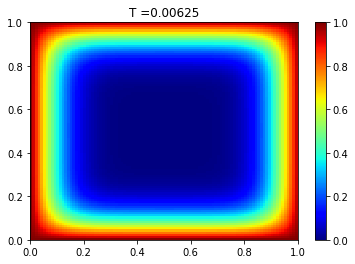

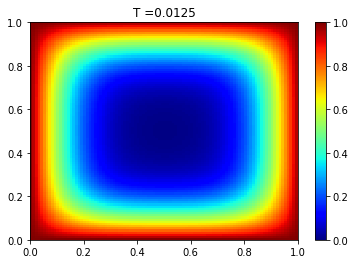

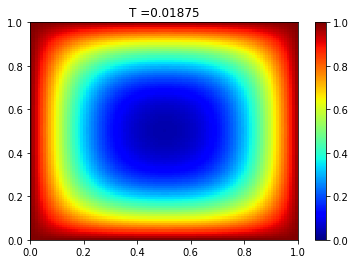

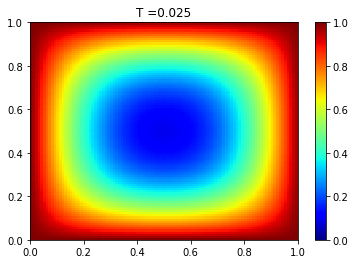

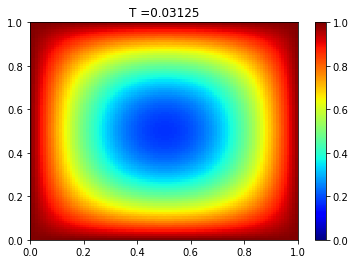

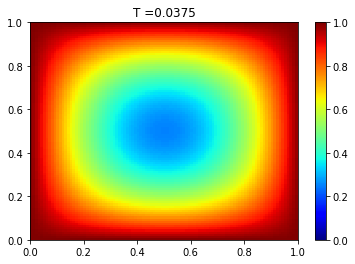

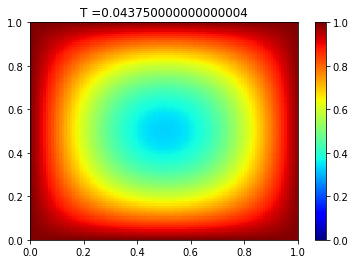

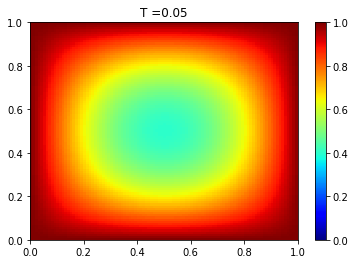

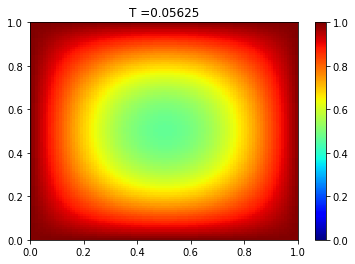

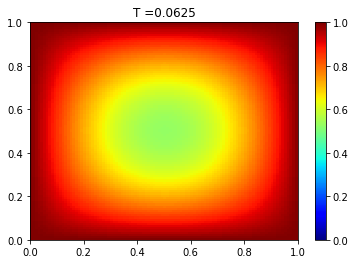

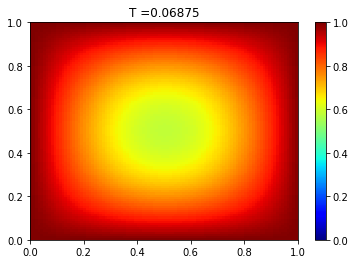

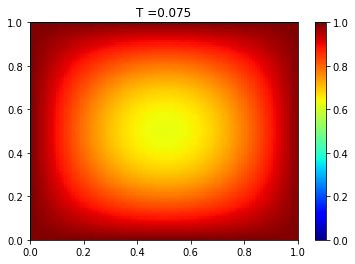

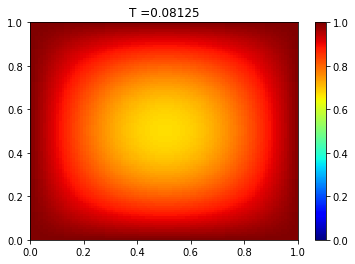

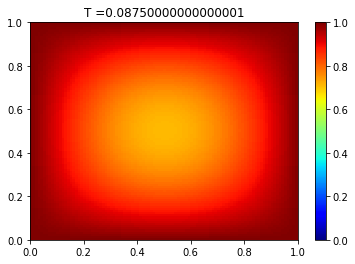

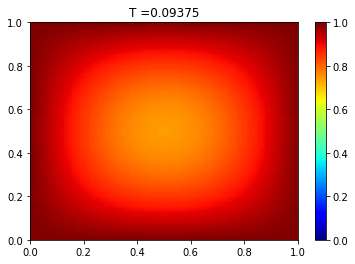

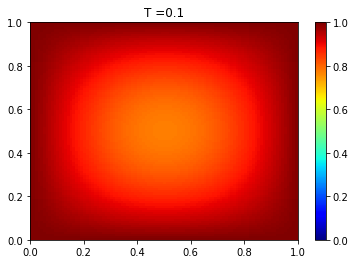

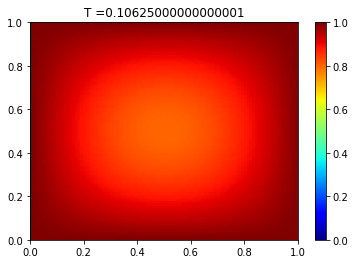

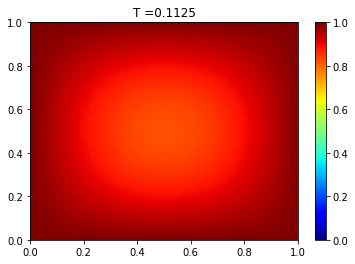

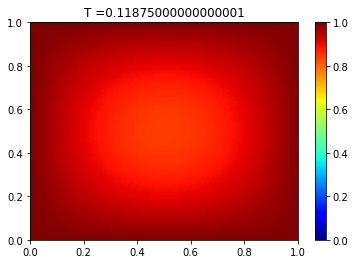

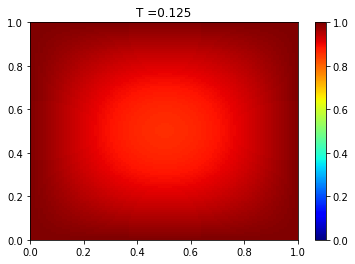

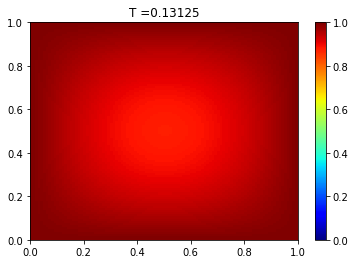

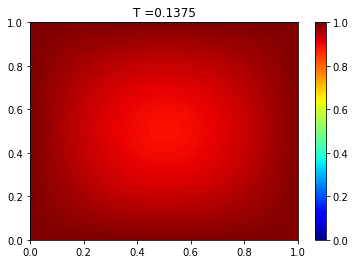

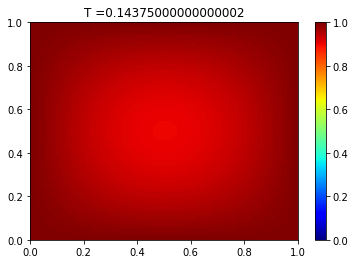

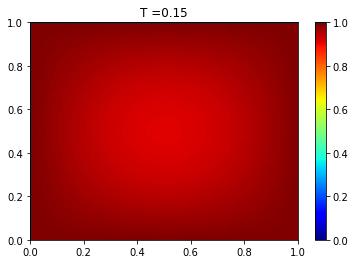

In [4]:
img = 1
for tt in range(1,T+1):
    U = jacobiHE2D(U, alpha, N, T)
    if tt%250==0:
        # Start plotting
        fig, ax = plt.subplots()
        im = ax.pcolormesh(x,y,U,cmap='jet',vmin=0., vmax=1.)
        cbar = fig.colorbar(im)
        plt.title("T ="+str(dt*tt))
        plt.savefig("2d25"+str(img)+".png", format='png')
        del fig,ax,im,cbar # Liberate Memory
        img += 1

In [5]:
#print(U)
#SS = U.copy()

In [6]:
print(U)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.99991724 0.99983457 ... 0.99983457 0.99991724 1.        ]
 [1.         0.99983457 0.9996693  ... 0.9996693  0.99983457 1.        ]
 ...
 [1.         0.99983457 0.9996693  ... 0.9996693  0.99983457 1.        ]
 [1.         0.99991724 0.99983457 ... 0.99983457 0.99991724 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
